# k-means clustering

"*Despite its drawbacks, k-means remains the most widely used partitional clustering algorithm in practice.*”
Top 10 algorithms in data mining by X. Wu et al. DOI 10.1007/s10115-007-0114-2

## Overview

The k-means algorithm can be used to find clusters in a dataset using only an initial guess of the number of clusters. By alternating between two steps, the algorithm gradually learns more reasonable centers for each cluster until a steady state is reached. This is known as the *expectation-maximization algorithm*. In this notebook, you will apply k-means to two sets of data and think about the pros and cons of the k-means algorithm. At the end you will apply k-means to images where you will segment an image by grouping similarly colored pixels in an image.

## k-means algorithm

Consider data points $\textbf{x}_1, \textbf{x}_2, \dots, \textbf{x}_N \in \mathbb{R}^D$ and a positive whole number $k \leq N$. The goal of k-means is to minimize the objective function which is the within cluster variance or sum of the squared errors:
$$ \sum_{i=1}^N \|\textbf{x}_i-\mu_{l_i}\|^2 $$
where $\mu_1, \dots, \mu_k \in \mathbb{R}^D$ are the *k* cluster centers (aka centroids) and $l_1, \dots, l_N \in \{1, 2, \dots, k\}$ are the cluster assignments. 

*A note on notation*: if $\textbf{x}_2 = (3,5) \in \mathbb{R}^2$ is assigned to cluster 3 which has center $(4,4)$, then $l_2 = 3$ and $\mu_{l_2}=\mu_3=(4,4)$. Furthermore, $\|(3,5)-(4,4)\|^2 = (3-4)^2+(5-4)^2 = 2$.

After initializing *k* centers, the two alternating steps of the most basic k-means algorithm (known as Lloyd's algorithm) are:
- **Expectation Step**. Assign each data point to the closest center. 
- **Maximization Step**. Update each center to be the mean of the data points assigned to that specific cluster.

When the centers no longer change, the iterative algorithm stops.

## Implementing k-means in Python

In [70]:
# importing necessary packages
import matplotlib.pyplot as plt
import random
import numpy as np
import math
import pandas as pd
from sklearn.cluster import KMeans
from PIL import Image
from scipy.spatial import Voronoi, voronoi_plot_2d

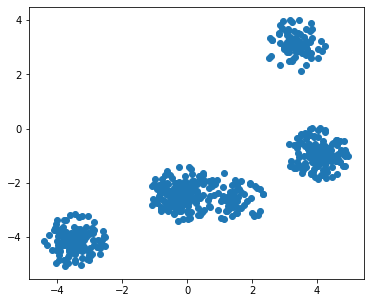

In [71]:
# reading in clouds dataset 2 x 1000. Each column is a data point in the plane R^2.
cloudsDF = pd.read_csv("pointclouds.csv", header = None)
clouds = cloudsDF.to_numpy()
plt.rcParams['figure.figsize'] = [6, 5] # adjust size of plot
plt.scatter(clouds[0], clouds[1]);

We will make use of the KMeans clustering function in scikit learn. You can find the documentation at this link: (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). If you want to gain more practice programming or better learn the k-means algorithm, I encourage you to write your own k-means function. 

In this toy example, we assume the number of clusters is five so we initialize `n_clusters = 5`. The `init='random'` argument will select five random data points as the initial centers. The `n_init = 1` argument runs the k-means algorithm once.

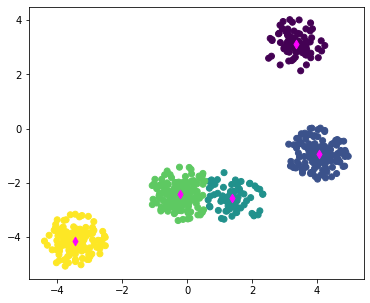

In [72]:
kmeans = KMeans(n_clusters=5, init='random', n_init=1).fit(np.transpose(clouds)) 
# need to transpose dataset since the k-means function assumes data points are rows rather than columns.
labels = kmeans.labels_ # use labels or cluster assignments to visualize results
centers = kmeans.cluster_centers_
plt.scatter(clouds[0], clouds[1], c=labels); # each color represents a different cluster
plt.scatter(np.transpose(centers)[0], np.transpose(centers)[1], marker='d', c='magenta'); # plot centers of clusters as pink diamonds

## Voronoi Perspective on k-means

The centers found from k-means determine a voronoi diagram or partition of the plane. There is one cell for each center and any point within a cell gets clustered with the corresponding center.

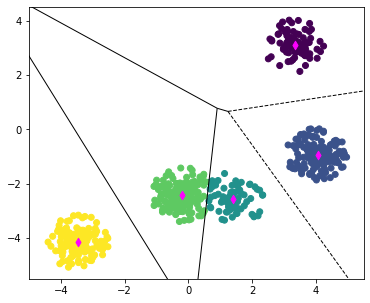

In [73]:
voronoi_partition = Voronoi(centers)
voronoi_plot_2d(voronoi_partition, show_points = False, show_vertices = False);
plt.scatter(clouds[0], clouds[1], c=labels);
plt.scatter(np.transpose(centers)[0], np.transpose(centers)[1], marker='d', c='magenta');
plt.xlim(-5,5.5);
plt.ylim(-5.5,4.5)
plt.show()

## k-means algorithm after each iteration

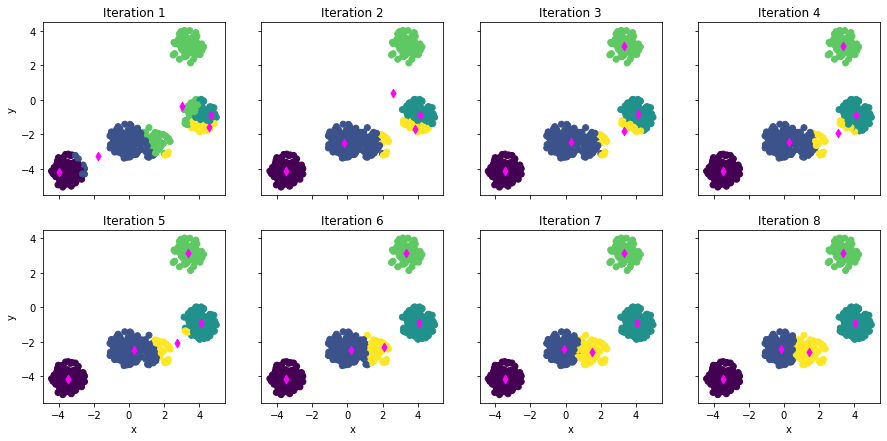

In [74]:
# plot k-means results after each iteration in the algorithm
plt.rcParams['figure.figsize'] = [15, 7]
fig, axs = plt.subplots(2, 4)
SEED = 100 # adjust seed to change initialization of centers
for i in range(2):
    for j in range(4):
        kmeans = KMeans(n_clusters=5, random_state=SEED, n_init=1, init='random', max_iter=(4*i+j)+1).fit(np.transpose(clouds))
        labels = kmeans.labels_ # use labels or cluster assignments to visualize results
        centers = kmeans.cluster_centers_ # extract centers of clusters
        axs[i,j].scatter(clouds[0], clouds[1], c=labels);
        axs[i,j].scatter(np.transpose(centers)[0], np.transpose(centers)[1], marker='d', c='magenta'); # plot centers
        axs[i,j].set_title("Iteration " + str((4*i+j)+1))

# Label axes
for ax in axs.flat:
    ax.set(xlabel='x', ylabel='y')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

## Running k-means multiple times

**Exercise 1**. Run the k-means function below several times. Do you get the same classification results on each run? Write your observations down and why you think you are getting the results you are seeing.

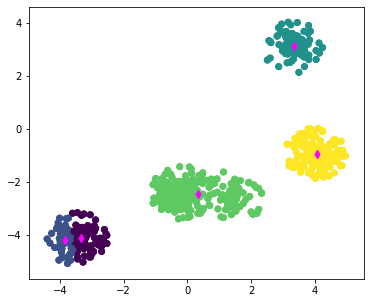

In [80]:
kmeans = KMeans(n_clusters=5, init='random', n_init=1).fit(np.transpose(clouds)) 
labels = kmeans.labels_ # use labels or cluster assignments to visualize results
centers = kmeans.cluster_centers_
plt.rcParams['figure.figsize'] = [6, 5] # adjust size of plot
plt.scatter(clouds[0], clouds[1], c=labels); # each color represents a different cluster
plt.scatter(clouds[0], clouds[1], c=labels);
plt.scatter(np.transpose(centers)[0], np.transpose(centers)[1], marker='d', c='magenta'); # plot centers

**Observations**. We do not get the same cluster assignments each time we run k-means. This suggests that the k-means clustering algorithm is sensitive to the initialization of the centers. Additionally, the differences in output also suggest that the k-means algorithm converges to a local minimum of the objective function and not necessarily a global minimum.

## Running k-means multiple times on rings dataset

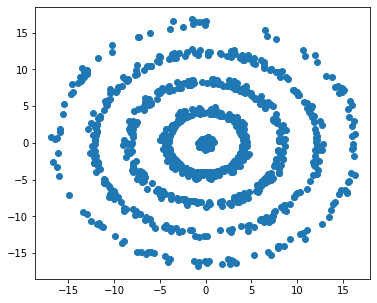

In [81]:
# reading in rings dataset 2 x 1000. Each column is a data point in the plane R^2.
ringsDF = pd.read_csv("pointrings.csv", header = None)
rings = ringsDF.to_numpy()
plt.scatter(rings[0], rings[1]);

**Exercise 2**. Run the k-means function below on the rings dataset several times. Do you get the same classification results on each run? Write your observations down and why you think you are getting the results you are seeing.

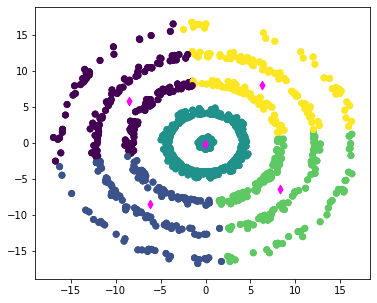

In [86]:
kmeans = KMeans(n_clusters=5, init='random', n_init=1).fit(np.transpose(rings)) 
labels = kmeans.labels_ # use labels or cluster assignments to visualize results
centers = kmeans.cluster_centers_
plt.rcParams['figure.figsize'] = [6, 5] # adjust size of plot
plt.scatter(rings[0], rings[1], c=labels); # each color represents a different cluster
plt.scatter(rings[0], rings[1], c=labels);
plt.scatter(np.transpose(centers)[0], np.transpose(centers)[1], marker='d', c='magenta'); # plot centers

**Observations**. Similar to before, we do not get the same cluster assignments each time we run k-means. Often the two most inner rings are clustered together and then each of the four other clusters contain points from the three outer rings. This example also shows that the k-means clustering algorithm is sensitive to the initialization of the centers and that the k-means algorithm converges to a local minimum of the objective function rather than a global minimum.

## Best Datasets for k-means

**Exercise 3**. Which dataset do you believe k-means performed a better job clustering, on average? Why do you believe this is the case?

**Observations**. If we assume that the five clusters of the rings dataset are each ring, then we saw that k-means never classified each ring as a cluster. Since we are using Euclidean distances to determine clusters, we are assuming that clusters have a spherical shape. Hence, k-means performed better on the clouds dataset on average.

## Initializing Centers

**Exercise 4**. Quite evidently, k-means clustering depends on the initial guess for the cluster centers. For this lab we initialized centers randomly but in general this can be unreliable. What alternative method(s) of initialization do you believe could improve on this?

One strategy would be to run k-means multiple times with different centers and pick the initialization that gave the "best" result. The "best" result can be determined using the eye ball test or by calculating the value of the objective function after each run of k-means, and picking the initial centers that gave the smallest value of the objective function.

A common strategy implemented in scikit learn is k-means++. The idea is to pick the first center at random and then pick the remaining centers so that they are far away from each other. More specifically, 
- Randomly pick the first center
- Calculate the distance between all data points and the center.
- Whichever data point had the largest distance, pick that data point as the next center.
- Repeat until you have selected k centers.

## Selecting k

**Exercise 5**. We have assumed that the number of clusters, *k*, is being revealed to us by some benevolent oracle. However, picking the best value of *k* is typically unknown to the user. Explain how you think the exact minimum of the k-means objective function behaves (on any dataset) as we increase k from 1 to *N*, where *N* is the number of data points.

As we increase k from 1 to *N*, the value of the objective function will decrease to zero. Since having *N* clusters does not reveal any new information about our data, we want to find a "sweet spot" between a small number of clusters and a small object function value.

**Exercise 6**. Now we will test this out by plotting the objective function vs. *k* as we increase *k* from 1 to *N*. We will use the built in `KMeans` function to do this. Our input parameters will change slightly now. The main difference is that we will set `n_init = 10` which is the default value. The argument `n_init` is the number of times the k-means algorithm runs with different initial centers. The final result is the best output of `n_init` consecutive runs in terms of the value of the objective function. The attribute `inertia_` is the value of the objective function which we will plot.

*Note*. We will apply this to the clouds dataset and only go up to k=100 since going to k=1000 is a lot of computation and would take a while.

In [21]:
objective = []
for k in range(100):
    kmeans = KMeans(n_clusters=k+1, init='random', n_init=10).fit(np.transpose(clouds)) 
                # we need k+1 since k starts at 0
    objective.append(kmeans.inertia_)

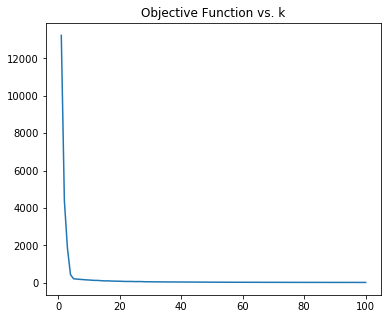

In [22]:
plt.plot([k+1 for k in range(100)], objective);
plt.title("Objective Function vs. k");

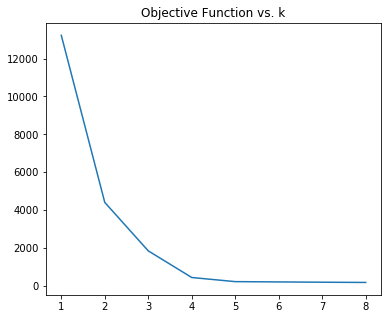

In [23]:
# The curve gets flat pretty fast. Let's take a look for k between 1 and 8
plt.plot([k+1 for k in range(8)], objective[0:8]);
plt.title("Objective Function vs. k");

**Exercise 7**. By analyzing these plots, which *k* value do you think is the best for the clouds dataset?

We want to find the "elbow" of this plot. This appears to be either 4 or 5. Using this plot combined with our knowledge of the dataset can help us better distinguish which value of k is best.

Side note: Another way to determine a good *k* is by looking at the silhouette value. From wikipedia: "*This is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.*"

## Sensitivity to Outliers

**Exercise 8**. Apply k-means several times to the cloud dataset with some added outliers. How does k-means perform?

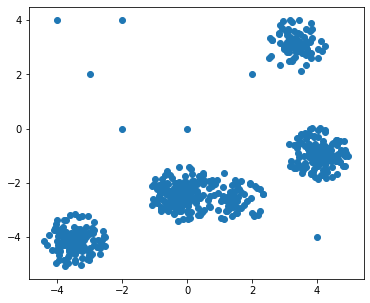

In [54]:
# reading in clouds dataset 2 x 1000. Each column is a data point in the plane R^2.
clouds_outliersDF = pd.read_csv("pointclouds-outliers.csv", header = None)
clouds_outliers = clouds_outliersDF.to_numpy()
plt.rcParams['figure.figsize'] = [6, 5] # adjust size of plot
plt.scatter(clouds_outliers[0], clouds_outliers[1]);

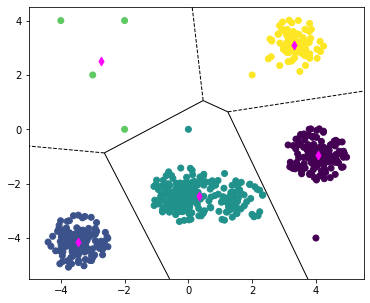

In [55]:
SEED = 11
kmeans = KMeans(n_clusters=5, init='random', random_state = SEED, n_init=1).fit(np.transpose(clouds_outliers)) 
# need to transpose dataset since the k-means function assumes data points are rows rather than columns.
labels = kmeans.labels_ # use labels or cluster assignments to visualize results
centers = kmeans.cluster_centers_

voronoi_partition = Voronoi(centers)
voronoi_plot_2d(voronoi_partition, show_points = False, show_vertices = False);
plt.scatter(clouds_outliers[0], clouds_outliers[1], c=labels);
plt.scatter(np.transpose(centers)[0], np.transpose(centers)[1], marker='d', c='magenta');
plt.xlim(-5,5.5);
plt.ylim(-5.5,4.5)
plt.show()

## Advantages and Disadvantages of k-means

**Exercise 8**. What are some advantages of the k-means clustering algorithm?

🎉 Relatively simple algorithm to implement and interpret

🎉 Guarantees convergence

🎉 Scales nicely to large datasets

🎉 Extends to many sophisticated and advanced clustering methods

🎉 Can be used to initialize centers for other clustering algorithms like Gaussian Mixture Models

**Exercise 9.** What are some disadvantages/drawbacks of the k-means clustering algorithm?

😩 Choosing the best *k* is non-trivial

😩 Sensitive to initial centers

😩 Has trouble clustering data of varying sizes and density

😩 Has trouble clustering non-spherical data

😩 Clustering is senstive to outliers

😩 Curse of dimensionality

## Application of k-means to image segmentation

We have seen that k-means is a clustering algorithm that can be used to cluster data and provide information on which data points are similar to one another. This has applications to classification tasks. We will end today's lesson by looking at how k-means can be used for image segmentation. This means we will compress or simplify an image by reducing the color palette to a fixed number of colors *k*.

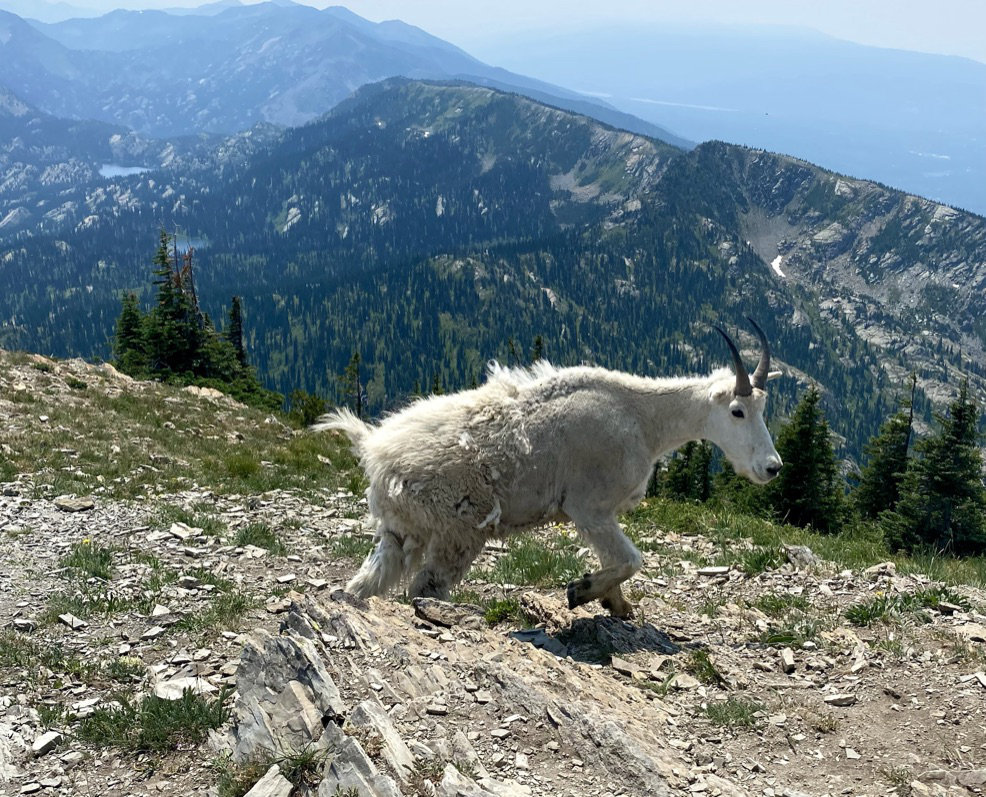

In [66]:
# Upload image
img_color = Image.open('mountain-goat.jpeg')
img_color

In [67]:
# Convert image to array of pixels with rgb values
rgb = np.array(img_color)
# The command rgb.shape tells you the height, width, and number of channels of the image. In order to apply
# k-means, we need an array of size (N, 3) where N is the number of pixels and 3 represents the red, green, 
# and blue value of each pixel. We can reshape the array with the following command:
reshape_rgb = np.reshape(rgb, (rgb.shape[0]*rgb.shape[1], 3))

In [68]:
# Apply k-means to the rgb values
k = 3 # number of clusters and colors in the compressed image
kmeans = KMeans(n_clusters = k, init = 'random', n_init = 10).fit(reshape_rgb) 
labels = kmeans.labels_ 
centers = kmeans.cluster_centers_
# color pixels of image based on the rgb value of its corresponding center from the k-means results
for i in range(len(reshape_rgb)):
    reshape_rgb[i] = centers[labels[i]]

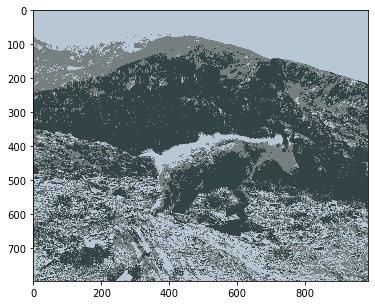

In [69]:
# reshape the modified array so it can be viewed as an image
rgb_compressed = np.reshape(reshape_rgb, (rgb.shape[0], rgb.shape[1], 3))
plt.imshow(rgb_compressed);
plt.savefig("compressed_image.png")

**Exercise 10**. Rerun the code above but with `k = 5, 10, 15`. What happens to the compressed image as you increase the number of clusters?

As we increase the number of clusters, we add more colors to the color pallete of the image and hence get an image closer to the original.

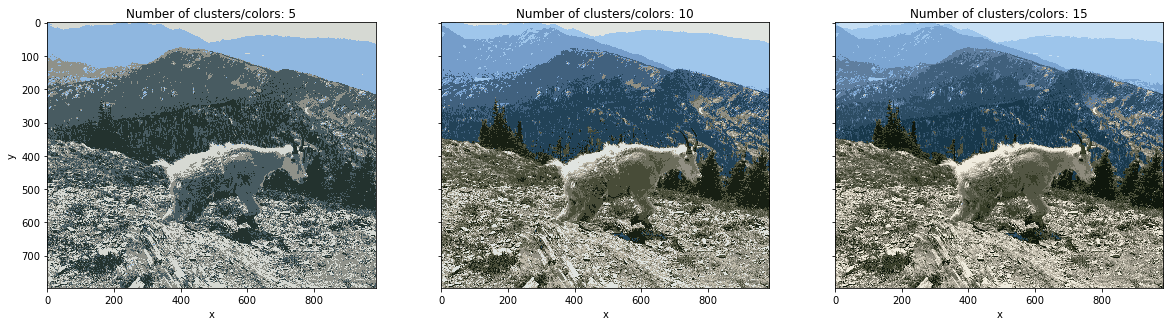

In [49]:
# plot k-means results after each iteration in the algorithm
plt.rcParams['figure.figsize'] = [20, 15]
fig, axs = plt.subplots(1, 3)
SEED = 100 # adjust seed to change initialization of centers
for j in range(3):
    rgb = np.array(img_color)
    reshape_rgb = np.reshape(rgb, (rgb.shape[0]*rgb.shape[1], 3))
    kmeans = KMeans(n_clusters=5*j+5, random_state=SEED, n_init=10, init='random').fit(reshape_rgb)
    labels = kmeans.labels_ 
    centers = kmeans.cluster_centers_
    # color pixels of image based on the rgb value of its corresponding center from the k-means results
    for i in range(len(reshape_rgb)):
        reshape_rgb[i] = centers[labels[i]]
    rgb_compressed = np.reshape(reshape_rgb, (rgb.shape[0], rgb.shape[1], 3))
    axs[j].imshow(rgb_compressed);
    axs[j].set_title("Number of clusters/colors: " + str(5*j+5))

# Label axes
for ax in axs.flat:
    ax.set(xlabel='x', ylabel='y')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

**Exercise 11**. Rerun the code above but with an image of your choosing and modifying k so that you get a compressed image that you are proud of! Make sure you add the image to the same folder this jupyter notebook file is contained in.